In [78]:
import numpy as np
import pandas as pd
import requests
import json
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import kaleido
import plotly
import time

## Define search engine version

In [7]:
if "SEARCH_VERSION" not in locals():
    SEARCH_VERSION = "new"
else:
    print(SEARCH_VERSION)

In [8]:
# Parameters
SEARCH_VERSION = "2.0"


In [9]:
SEARCH_VERSION

'2.0'

## Import lastest elastic data

In [13]:
!pwd

/home/jovyan/work/annuaire-entreprises-search-api/testing/output/notebooks


In [16]:
df_test = pd.read_csv("../../data/elastic_wars.csv", dtype=str)

In [17]:
df_test.head(3)

,terms,siren,results_elastic_1,pages_elastic_1,siren_elastic_1,resp_time_elastic_1,rank_elastic_1,results_elastic_1.1,pages_elastic_1.1,siren_elastic_1.1,resp_time_elastic_1.1,rank_elastic_1.1
0,stellantis,879786085,1353.0,68.0,"['879786085', '803902485', '379118748', '75231...",0.131647,0,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.042709,0
1,STELLANTIS,879786085,1353.0,68.0,"['879786085', '803902485', '379118748', '75231...",0.045476,0,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.041482,0
2,Stellantis,879786085,1353.0,68.0,"['879786085', '803902485', '379118748', '75231...",0.077246,0,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.040855,0


In [18]:
df_test.columns

Index(['terms', 'siren', 'results_elastic_1', 'pages_elastic_1',
       'siren_elastic_1', 'resp_time_elastic_1', 'rank_elastic_1',
       'results_elastic_1.1', 'pages_elastic_1.1', 'siren_elastic_1.1',
       'resp_time_elastic_1.1', 'rank_elastic_1.1'],
      dtype='object')

In [19]:
df_test.shape

(928, 12)

In [20]:
df_test.dtypes

terms                    object
siren                    object
results_elastic_1        object
pages_elastic_1          object
siren_elastic_1          object
resp_time_elastic_1      object
rank_elastic_1           object
results_elastic_1.1      object
pages_elastic_1.1        object
siren_elastic_1.1        object
resp_time_elastic_1.1    object
rank_elastic_1.1         object
dtype: object

## Call last search functions (maybe add description)

In [64]:
def find(key, dictionary):
    for k, v in dictionary.items():
        if k == key:
            yield v
        elif isinstance(v, dict):
            for result in find(key, v):
                yield result
        elif isinstance(v, list):
            for d in v:
                for result in find(key, d):
                    yield result

In [65]:
def get_response(url, q):
    params["q"] = q
    response = requests.get(url, params=params)
    time_elapsed = response.elapsed.total_seconds()
    content = json.loads(response.content)
    total_results = content["total_results"]
    total_pages = content["total_pages"]
    siren_list = [unite["siren"] for unite in content["results"]]
    return total_results, total_pages, siren_list, time_elapsed

In [66]:
url_elastic = "http://api.sirene.dataeng.etalab.studio/search"

In [67]:
# Get first 20 results
params = {"q": "", "page": "1", "per_page": "20"}

In [68]:
(
    df_test[f"results_elastic_{SEARCH_VERSION}"],
    df_test[f"pages_elastic_{SEARCH_VERSION}"],
    df_test[f"siren_elastic_{SEARCH_VERSION}"],
    df_test[f"resp_time_elastic_{SEARCH_VERSION}"],
) = ("", "", "", "")

In [69]:
df_test.columns

Index(['terms', 'siren', 'results_elastic_1', 'pages_elastic_1',
       'siren_elastic_1', 'resp_time_elastic_1', 'rank_elastic_1',
       'results_elastic_1.1', 'pages_elastic_1.1', 'siren_elastic_1.1',
       'resp_time_elastic_1.1', 'rank_elastic_1.1', 'results_elastic_2.0',
       'pages_elastic_2.0', 'siren_elastic_2.0', 'resp_time_elastic_2.0'],
      dtype='object')

In [76]:
df_test.head(20)

,terms,siren,results_elastic_1,pages_elastic_1,siren_elastic_1,resp_time_elastic_1,rank_elastic_1,results_elastic_1.1,pages_elastic_1.1,siren_elastic_1.1,resp_time_elastic_1.1,rank_elastic_1.1,results_elastic_2.0,pages_elastic_2.0,siren_elastic_2.0,resp_time_elastic_2.0
0,stellantis,879786085,1353.0,68.0,"['879786085', '803902485', '379118748', '75231...",0.131647,0,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.042709,0,1047,53,"[879786085, 912425493, 910055672, 911254209, 3...",0.045245
1,STELLANTIS,879786085,1353.0,68.0,"['879786085', '803902485', '379118748', '75231...",0.045476,0,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.041482,0,1047,53,"[879786085, 912425493, 910055672, 911254209, 3...",0.039561
2,Stellantis,879786085,1353.0,68.0,"['879786085', '803902485', '379118748', '75231...",0.077246,0,1383.0,70.0,"['879786085', '803902485', '500019898', '37911...",0.040855,0,1047,53,"[879786085, 912425493, 910055672, 911254209, 3...",0.039545
3,air france,420495178,1129.0,57.0,"['420495178', '632041042', '314119504', '37800...",0.062059,0,1177.0,59.0,"['420495178', '632041042', '314119504', '37800...",0.06589,0,1670,84,"[420495178, 775740822, 314119504, 632041042, 7...",0.168755
4,Air france,420495178,1129.0,57.0,"['420495178', '632041042', '314119504', '37800...",0.107978,0,1177.0,59.0,"['420495178', '632041042', '314119504', '37800...",0.077272,0,1670,84,"[420495178, 775740822, 314119504, 632041042, 7...",0.055684
5,AIR FRANCE,420495178,1129.0,57.0,"['420495178', '632041042', '314119504', '37800...",0.069768,0,1177.0,59.0,"['420495178', '632041042', '314119504', '37800...",0.060791,0,1670,84,"[420495178, 775740822, 314119504, 632041042, 7...",0.051614
6,Air France,420495178,1129.0,57.0,"['420495178', '632041042', '314119504', '37800...",0.061518,0,1177.0,59.0,"['420495178', '632041042', '314119504', '37800...",0.060151,0,1670,84,"[420495178, 775740822, 314119504, 632041042, 7...",0.049268
7,AIR france,420495178,1129.0,57.0,"['420495178', '632041042', '314119504', '37800...",0.074495,0,1177.0,59.0,"['420495178', '632041042', '314119504', '37800...",0.061842,0,1670,84,"[420495178, 775740822, 314119504, 632041042, 7...",0.04892
8,airbus operation,420916918,8.0,1.0,"['420916918', '775581184', '775746282', '84057...",0.033765,0,8.0,1.0,"['420916918', '775581184', '775746282', '58080...",0.018846,0,16,1,"[420916918, 775581184, 775746282, 390688422, 8...",0.044411
9,AIRBUS OPERATIONS,420916918,8.0,1.0,"['420916918', '775581184', '775746282', '84057...",0.027614,0,8.0,1.0,"['420916918', '775581184', '775746282', '58080...",0.018685,0,16,1,"[420916918, 775581184, 775746282, 390688422, 8...",0.02787


In [79]:
for index, row in df_test.iterrows():
    (
        df_test[f"results_elastic_{SEARCH_VERSION}"][index],
        df_test[f"pages_elastic_{SEARCH_VERSION}"][index],
        df_test[f"siren_elastic_{SEARCH_VERSION}"][index],
        df_test[f"resp_time_elastic_{SEARCH_VERSION}"][index],
    ) = get_response(url_elastic, row["terms"])
    if index % 5 == 0: 
        time.sleep(1)

In [81]:
df_test.tail(10)

,terms,siren,results_elastic_1,pages_elastic_1,siren_elastic_1,resp_time_elastic_1,rank_elastic_1,results_elastic_1.1,pages_elastic_1.1,siren_elastic_1.1,resp_time_elastic_1.1,rank_elastic_1.1,results_elastic_2.0,pages_elastic_2.0,siren_elastic_2.0,resp_time_elastic_2.0
918,agfpa,302656947,240.0,13.0,"['302656947', '381210384', '399250133', '85335...",0.079689,0,240.0,13.0,"['302656947', '381210384', '853358844', '39925...",0.022937,0,260,13,"[302656947, 889983144, 792857294, 305493405, 8...",0.023625
919,print n go,522032994,5.0,1.0,"['889693701', '885330217', '889283487', '82053...",0.0229,-1,6.0,1.0,"['889693701', '885330217', '819345893', '88928...",0.0177,-1,5,1,"[885330217, 889693701, 889283487, 820538908, 0...",0.015649
920,print%27n%27go,522032994,0.0,1.0,[],0.0192,-1,0.0,1.0,[],0.013765,-1,0,0,[],0.010006
921,planete urgence,433095718,75.0,4.0,"['433095718', '775649148', '450168521', '79523...",0.051655,0,75.0,4.0,"['433095718', '775649148', '403940307', '41033...",0.043997,0,2,1,"[433095718, 775649148]",0.069973
922,doudou creches vaudetard 2,899691851,1.0,1.0,['899691851'],0.04671,0,1.0,1.0,['899691851'],0.039624,0,2,1,"[899691851, 447818600]",0.038051
923,pontecaille gregoire,818452476,1.0,1.0,['818452476'],0.048877,0,1.0,1.0,['818452476'],0.043938,0,1,1,[818452476],0.043032
924,sherpa,393825229,2982.0,150.0,"['801698242', '515198844', '449614189', '39382...",0.043074,3,3028.0,152.0,"['801698242', '515198844', '449614189', '53166...",0.037458,6,702,36,"[801698242, 334075736, 515198844, 500913785, 4...",0.037105
925,sherpa,500913785,2982.0,150.0,"['801698242', '515198844', '449614189', '39382...",0.087631,4,3028.0,152.0,"['801698242', '515198844', '449614189', '53166...",0.037149,8,702,36,"[801698242, 334075736, 515198844, 500913785, 4...",0.031708
926,mc animation,820552925,5.0,1.0,"['820552925', '440736965', '398015974', '50865...",0.021864,0,9.0,1.0,"['820552925', '440736965', '398015974', '52854...",0.018714,0,7,1,"[820552925, 440736965, 398015974, 508659836, 4...",0.071748
927,mc animation,440736965,5.0,1.0,"['820552925', '440736965', '398015974', '50865...",0.021376,1,9.0,1.0,"['820552925', '440736965', '398015974', '52854...",0.018864,1,7,1,"[820552925, 440736965, 398015974, 508659836, 4...",0.029264


In [82]:
elastic_columns = [
    col
    for col in df_test.columns
    if "elastic" in col and ("result" in col or "pages" in col or "resp_time" in col)
]

In [83]:
elastic_columns

['results_elastic_1',
 'pages_elastic_1',
 'resp_time_elastic_1',
 'results_elastic_1.1',
 'pages_elastic_1.1',
 'resp_time_elastic_1.1',
 'results_elastic_2.0',
 'pages_elastic_2.0',
 'resp_time_elastic_2.0']

In [84]:
for col in elastic_columns:
    df_test[col] = df_test[col].astype("float64")

In [85]:
df_test.dtypes

terms                     object
siren                     object
results_elastic_1        float64
pages_elastic_1          float64
siren_elastic_1           object
resp_time_elastic_1      float64
rank_elastic_1            object
results_elastic_1.1      float64
pages_elastic_1.1        float64
siren_elastic_1.1         object
resp_time_elastic_1.1    float64
rank_elastic_1.1          object
results_elastic_2.0      float64
pages_elastic_2.0        float64
siren_elastic_2.0         object
resp_time_elastic_2.0    float64
dtype: object

In [86]:
df_test.describe()

,results_elastic_1,pages_elastic_1,resp_time_elastic_1,results_elastic_1.1,pages_elastic_1.1,resp_time_elastic_1.1,results_elastic_2.0,pages_elastic_2.0,resp_time_elastic_2.0
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,1224.755388,61.913793,0.062363,1234.367457,62.392241,0.046484,788.565733,39.990302,0.045400
std,2878.074095,143.965180,0.031763,2888.162538,144.472291,0.023826,2179.655424,108.887356,0.022442
min,0.000000,1.000000,0.018051,0.000000,1.000000,0.009341,0.000000,0.000000,0.010006
25%,3.000000,1.000000,0.040811,3.750000,1.000000,0.031379,4.000000,1.000000,0.030637
50%,23.000000,2.000000,0.053917,25.000000,2.000000,0.040901,24.000000,2.000000,0.040030
75%,266.250000,14.000000,0.077933,269.000000,14.000000,0.055135,222.000000,12.000000,0.052449
max,10000.000000,501.000000,0.324647,10000.000000,501.000000,0.164046,10000.000000,500.000000,0.163182


In [89]:
df_test.describe().to_csv(
    f"../../output/describe/describe_{SEARCH_VERSION}.csv", header=True, index=True
)

## Ranks

In [90]:
df_test[f"rank_elastic_{SEARCH_VERSION}"] = ""

In [91]:
for ind, row in df_test.iterrows():
    if str(row["siren"]) in row[f"siren_elastic_{SEARCH_VERSION}"]:
        df_test[f"rank_elastic_{SEARCH_VERSION}"][ind] = row[
            f"siren_elastic_{SEARCH_VERSION}"
        ].index(str(row["siren"]))
    else:
        df_test[f"rank_elastic_{SEARCH_VERSION}"][ind] = -1

In [92]:
df_test[f"rank_elastic_{SEARCH_VERSION}"] = df_test[
    f"rank_elastic_{SEARCH_VERSION}"
].astype("int32")

## KPIs

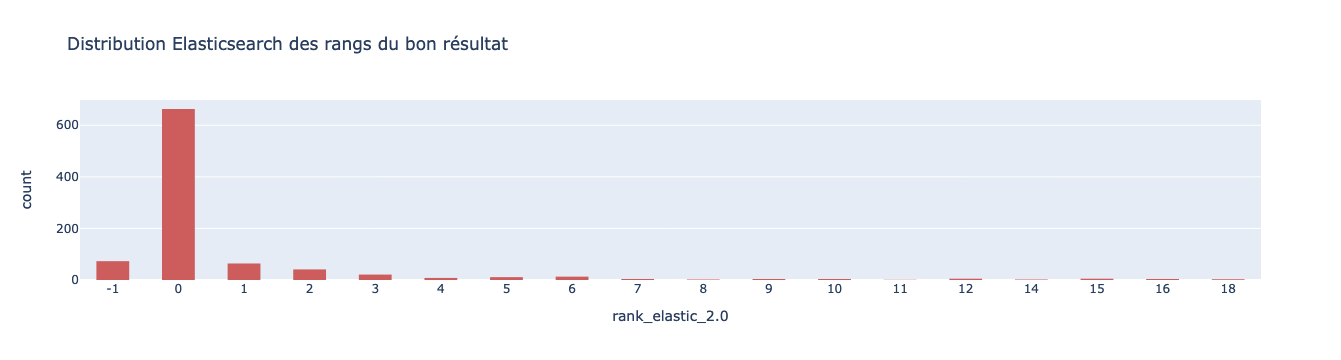

'../../output/plots/rank_2.0.html'

In [94]:
fig = px.histogram(
    df_test.sort_values(by=[f"rank_elastic_{SEARCH_VERSION}"]),
    x=f"rank_elastic_{SEARCH_VERSION}",
    color_discrete_sequence=["indianred"],
    title="Distribution Elasticsearch des rangs du bon résultat",
)
fig.update_layout(bargap=0.5)
fig.update_xaxes(type="category")
fig.show()
plotly.offline.plot(fig, filename=f"../../output/plots/rank_{SEARCH_VERSION}.html")

In [95]:
rank_columns = [col for col in df_test.columns if "rank_elastic" in col]

In [96]:
rank_columns

['rank_elastic_1', 'rank_elastic_1.1', 'rank_elastic_2.0']

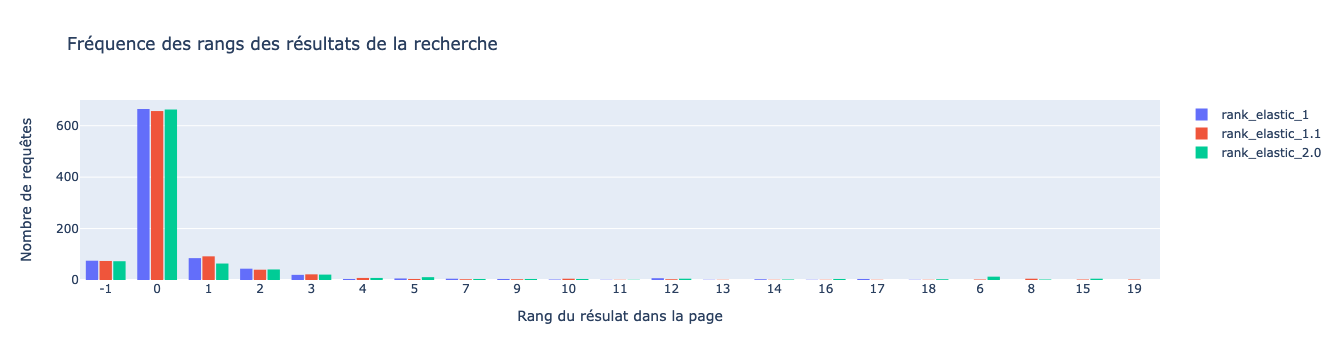

'../../output/plots/rank_war_2.0.html'

In [97]:
fig = go.Figure()
rank_dict = {}
for rank in rank_columns:
    df_test[rank] = df_test[rank].astype("int32")
    rank_dict[rank] = df_test.sort_values(by=[rank])[rank]
    fig.add_trace(
        go.Histogram(
            histfunc="count",
            x=rank_dict[rank],
            name=rank,
        )
    )
fig.update_layout(
    title_text="Fréquence des rangs des résultats de la recherche",  # title of plot
    xaxis_title_text="Rang du résulat dans la page",  # xaxis label
    yaxis_title_text="Nombre de requêtes",  # yaxis label
    bargap=0.2,  # gap between bars of adjacent location coordinates
    bargroupgap=0.1,  # gap between bars of the same location coordinates
)
fig.update_xaxes(type="category")
fig.show()
# fig.write_image(f"./output/plots/rank_{SEARCH_VERSION}.png")
plotly.offline.plot(fig, filename=f"../../output/plots/rank_war_{SEARCH_VERSION}.html")

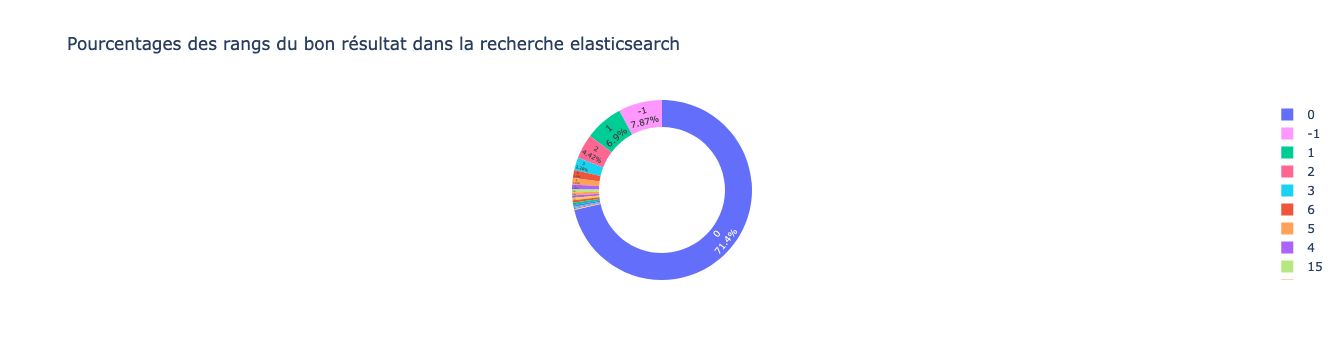

'../../output/plots/pie_2.0.html'

In [98]:
fig = px.pie(
    df_test,
    names=rank_columns[-1],
    hole=0.7,
    color=rank_columns[-1],
    title="Pourcentages des rangs du bon résultat dans la recherche elasticsearch",
)
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()
plotly.offline.plot(fig, filename=f"../../output/plots/pie_{SEARCH_VERSION}.html")

### Nombre maximale de requête


In [99]:
df_max = (
    df_test[f"results_elastic_{SEARCH_VERSION}"].value_counts(normalize=True) * 100
).reset_index()
df_max[df_max["index"] == "10000.0"].to_csv(
    f"../../output/describe/max_requetes_{SEARCH_VERSION}.csv", header=True, index=True
)
df_max[df_max["index"] == "10000.0"]

,index,results_elastic_2.0


### Sauvegarder les dataframes

In [100]:
df_test.to_csv(f"../../data/elastic_wars_{SEARCH_VERSION}.csv", header=True, index=False)

In [101]:
elastic_columns = [col for col in df_test.columns if "elastic" in col]
columns_to_save = ["terms", "siren"]
columns_to_save = columns_to_save + elastic_columns[-10:]
columns_to_save

['terms',
 'siren',
 'results_elastic_1.1',
 'pages_elastic_1.1',
 'siren_elastic_1.1',
 'resp_time_elastic_1.1',
 'rank_elastic_1.1',
 'results_elastic_2.0',
 'pages_elastic_2.0',
 'siren_elastic_2.0',
 'resp_time_elastic_2.0',
 'rank_elastic_2.0']

In [103]:
df_test.to_csv(
    f"../../data/elastic_wars.csv", header=True, index=False, columns=columns_to_save
)